<a href="https://colab.research.google.com/github/Bodyanuna/MIndM/blob/main/MIndM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Lab2_data_2.csv to Lab2_data_2 (2).csv
Результати оцінки моделей:
         train_mse   test_mse  train_r2   test_r2
Linear   20.237029  22.557497  0.619359  0.634481
Poly_2    4.695620   5.107235  0.911680  0.917243
Poly_3    0.514921   0.577542  0.990315  0.990642
Poly_6    0.138704   0.147085  0.997391  0.997617
Poly_12   0.186744   0.201235  0.996488  0.996739


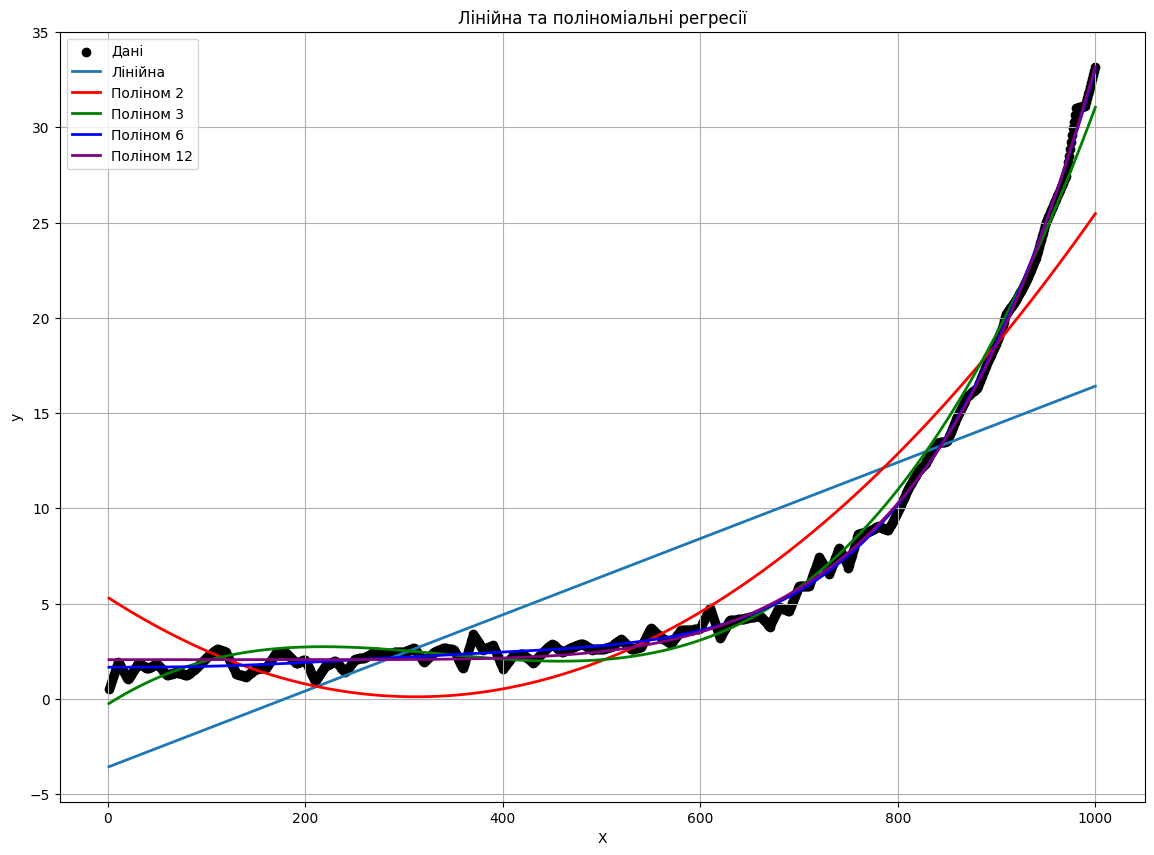


Висновок:
 - Лінійна модель недопідганяє дані (низьке R²).
 - Поліном 2 описує криву краще, але ще є похибки.
 - Поліном 3 дає оптимальний баланс між точністю і складністю.
 - Поліноми 6 і 12 дуже точні, але є ризик перепідгонки.
 >> Оптимальним ступенем полінома є 3 (або 6 для максимальної точності).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Завантаження даних у Google Colab
from google.colab import files
uploaded = files.upload()   # вибери файл Lab2_data_2.csv
file_path = "Lab2_data_2.csv"
data = pd.read_csv(file_path)

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

# 2. Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Функція для оцінки моделі
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return {
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
    }

results = {}

# 2a. Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
results["Linear"] = evaluate_model(lin_reg, X_train, y_train, X_test, y_test)

# 2b. Поліноміальні регресії
degrees = [2, 3, 6, 12]
poly_models = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    poly_models[d] = (poly, model)
    results[f"Poly_{d}"] = evaluate_model(model, X_train_poly, y_train, X_test_poly, y_test)

# 3. Порівняння показників
results_df = pd.DataFrame(results).T
print("Результати оцінки моделей:")
print(results_df)

# 4. Побудова графіків
plt.figure(figsize=(14, 10))
plt.scatter(X, y, color="black", label="Дані")

x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

# Лінійна модель
plt.plot(x_range, lin_reg.predict(x_range), label="Лінійна", linewidth=2)

# Поліноміальні моделі
colors = ["red", "green", "blue", "purple"]
for d, color in zip(degrees, colors):
    poly, model = poly_models[d]
    plt.plot(
        x_range,
        model.predict(poly.transform(x_range)),
        color=color,
        linewidth=2,
        label=f"Поліном {d}",
    )

plt.legend()
plt.title("Лінійна та поліноміальні регресії")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# 5. Висновок
print("\nВисновок:")
print(" - Лінійна модель недопідганяє дані (низьке R²).")
print(" - Поліном 2 описує криву краще, але ще є похибки.")
print(" - Поліном 3 дає оптимальний баланс між точністю і складністю.")
print(" - Поліноми 6 і 12 дуже точні, але є ризик перепідгонки.")
print(" >> Оптимальним ступенем полінома є 3 (або 6 для максимальної точності).")
